In [1]:
# Importing the libraries

import numpy as np
import pandas as pd 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
%matplotlib inline

In [2]:
# Reading the CSV file through pandas

df = pd.read_csv('vgsales.csv')

print("Shape ", df.shape)
df.head()

Shape  (16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Cheking for the null values

df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [4]:
# droping the null values
df = df.dropna()

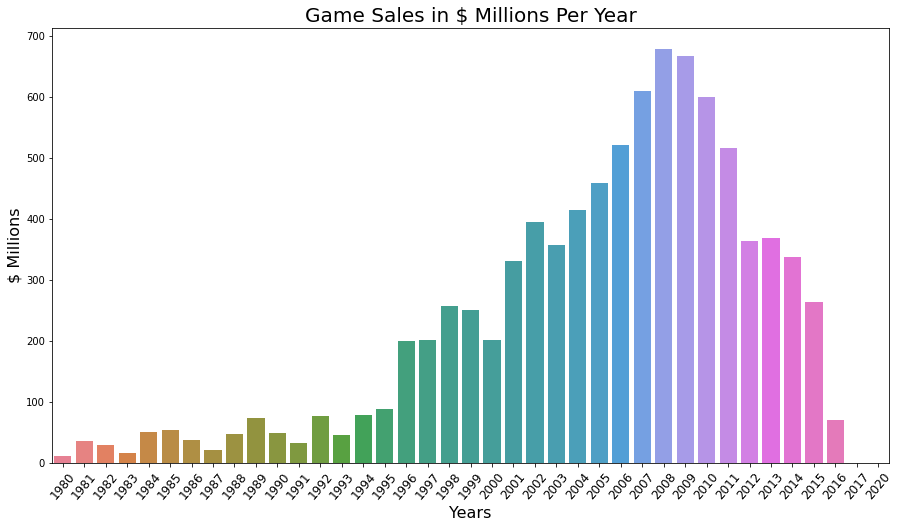

In [5]:
# Some insights in the dataset
# Global sales in a year

y = df.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(15,8))
ax = sns.barplot(y = y, x = x,palette="husl")
ax.set_xlabel(xlabel='Years', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ Millions', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show();

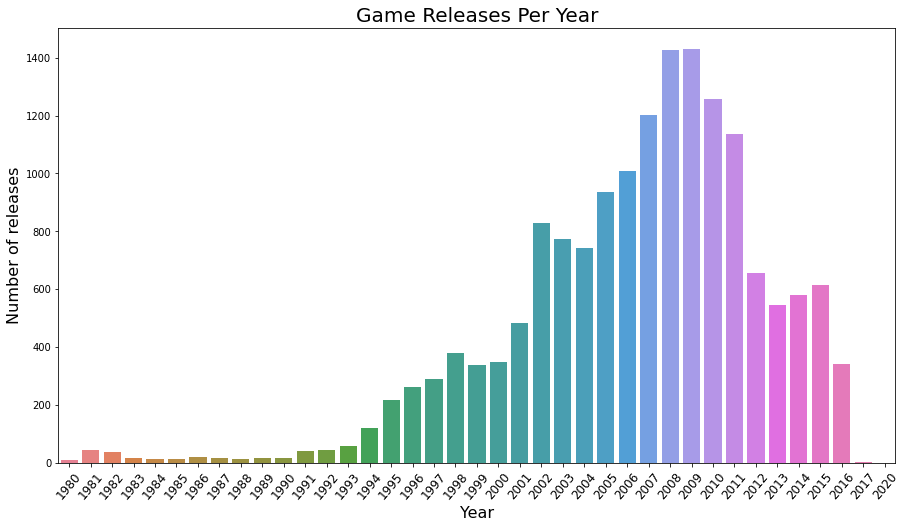

In [6]:
# Game releases per year

y = df.groupby(['Year']).count()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(15,8))
ax = sns.barplot(y = y, x = x, palette='husl')
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Number of releases', fontsize=16)
ax.set_title(label='Game Releases Per Year', fontsize=20)
plt.show();

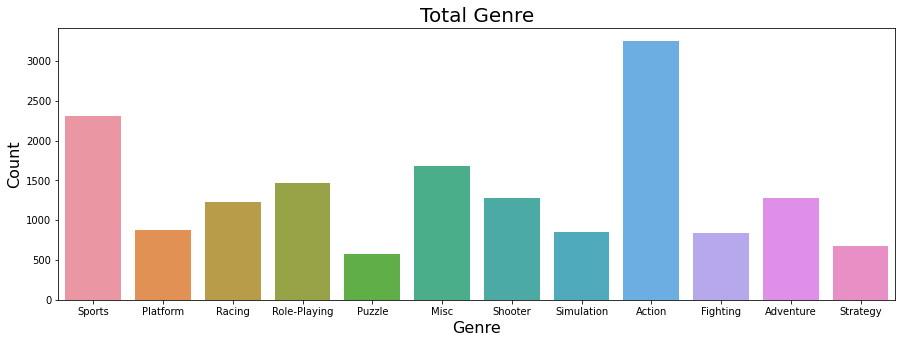

In [7]:
# Count genre

plt.figure(figsize=(15,5))
ax = sns.countplot(df['Genre'])
ax.set_xlabel(xlabel='Genre', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
ax.set_title(label='Total Genre', fontsize=20)
plt.show()

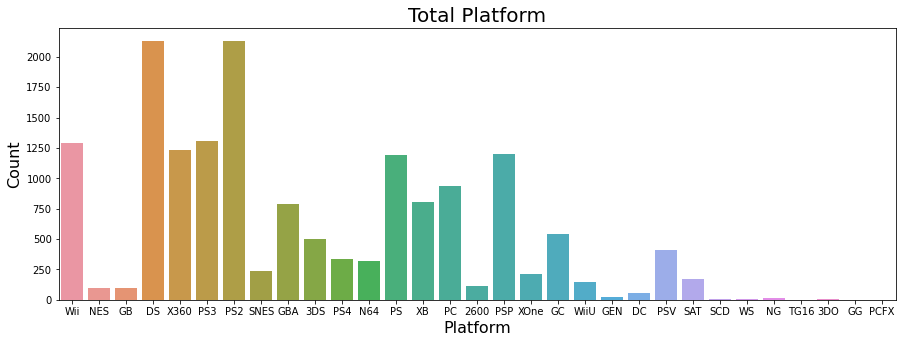

In [8]:
# Total Platform count


plt.figure(figsize=(15,5))
ax = sns.countplot(df['Platform'])
ax.set_xlabel(xlabel='Platform', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
ax.set_title(label='Total Platform', fontsize=20)
plt.show()

In [9]:
# Ccross tab for platform and genre

platGenre = pd.crosstab(df.Platform,df.Genre)
platGenre.head(5)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,55,1,1,5,9,8,4,0,22,1,10,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,180,36,14,53,28,19,10,85,6,28,25,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,335,238,36,389,89,236,66,196,42,280,146,78


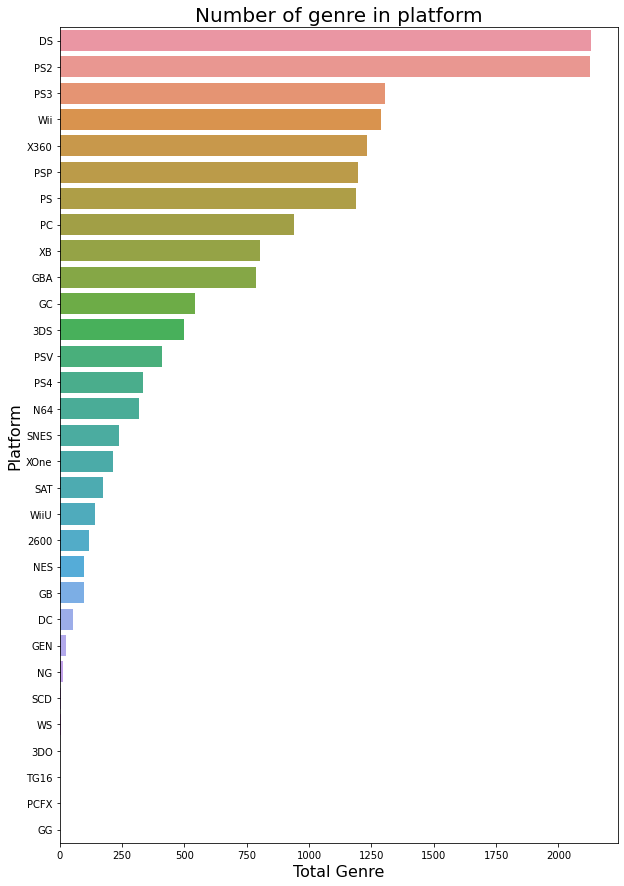

In [10]:
# Total genre in a platform

platGenreTotal =platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(10,15))
ax = sns.barplot(x=platGenreTotal.values,y=platGenreTotal.index)
ax.set_xlabel(xlabel='Total Genre', fontsize=16)
ax.set_ylabel(ylabel='Platform', fontsize=16)
ax.set_title(label='Number of genre in platform', fontsize=20)
plt.show()

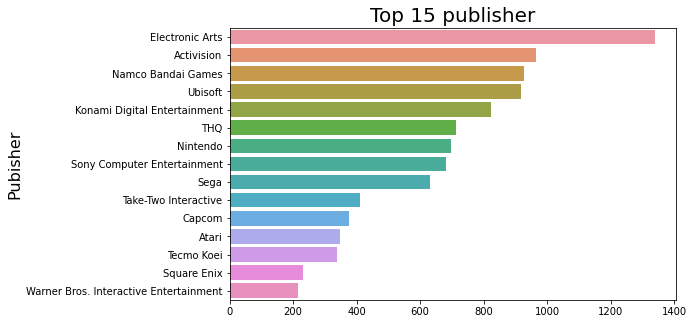

In [11]:
# Top 15 publisher

publisher = df.groupby('Publisher')['Publisher'].count().sort_values(ascending = False).head(15)
plt.figure(figsize=(8,5))
ax = sns.barplot(x=publisher.values,y=publisher.index)
# ax.set_xlabel(xlabel='Total Genre', fontsize=16)
ax.set_ylabel(ylabel='Pubisher', fontsize=16)
ax.set_title(label='Top 15 publisher', fontsize=20)
plt.show()

In [12]:
# Encoding the string into numeric

for column in df.columns:
    if df[column].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[column].values)) 
        df[column] = lbl.transform(list(df[column].values))

In [13]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,10849,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,9201,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,5493,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,4,10851,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,7247,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37


In [14]:
#Checking the datatype of each feature that they are numeric

df.dtypes

Rank              int64
Name              int64
Platform          int64
Year            float64
Genre             int64
Publisher         int64
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

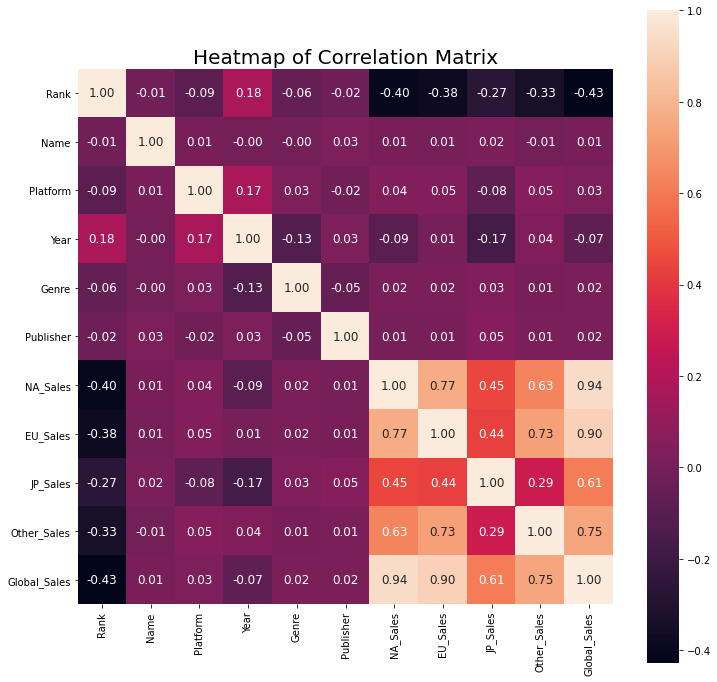

In [15]:
# Finding the coorelation between the data. shown in heatmap

corr=df.corr()
corr = (corr)
plt.figure(figsize=(12,12))
ax = sns.heatmap(corr,
                 cbar = True,
                 square = True, 
                 annot=True, 
                 fmt= '.2f',
                 annot_kws={'size': 12}
                )
ax.set_xticklabels(labels = corr.columns.values)
ax.set_yticklabels(labels = corr.columns.values, rotation=0)
ax.set_title('Heatmap of Correlation Matrix', fontsize=20)
plt.show()

In [16]:
# importing the libraries for algorithms

import xgboost as xgb
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

In [17]:
# Spliting the data into Train and Test set

label = df.pop('Global_Sales')
X_train, X_test, Y_train, Y_test = train_test_split(df, label, test_size = 0.2, random_state = 10)

In [18]:
# Checking the split data shape

X_train.shape, X_test.shape

((13032, 10), (3259, 10))

In [19]:
# Setting the parameter XGBOOST

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

In [20]:
#  Checking the CV output and creating the train data

dtrain = xgb.DMatrix(X_train, Y_train)
cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20, verbose_eval=50, show_stdv=False)

[0]	train-rmse:1.41025	test-rmse:1.41038
[50]	train-rmse:0.18584	test-rmse:0.21278
[100]	train-rmse:0.05029	test-rmse:0.10064
[150]	train-rmse:0.02457	test-rmse:0.08897
[200]	train-rmse:0.01526	test-rmse:0.08469
[250]	train-rmse:0.01167	test-rmse:0.08325
[300]	train-rmse:0.01007	test-rmse:0.08256
[350]	train-rmse:0.00882	test-rmse:0.08217
[400]	train-rmse:0.00770	test-rmse:0.08198
[450]	train-rmse:0.00675	test-rmse:0.08188


In [21]:
# Traning the XGBOOST model

xgb_model = xgb.train(dict(xgb_params), dtrain, num_boost_round = len(cv_output))

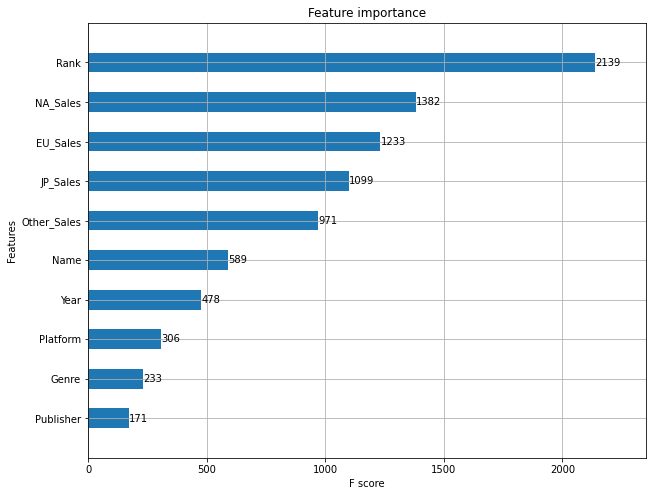

In [22]:
# Ploting the importance features by Feature Importance

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
xgb.plot_importance(xgb_model, max_num_features=50, height=0.5, ax=ax)

In [23]:
# Predicting by XGBOOST model

dtest=xgb.DMatrix(X_test)

y_predict = xgb_model.predict(dtest)
out = pd.DataFrame({'Actual_Global_Sales': Y_test, 'predict_Global_Sales': y_predict,'Diff' :(Y_test-y_predict)})
out[['Actual_Global_Sales','predict_Global_Sales','Diff']].head(5)

,Actual_Global_Sales,predict_Global_Sales,Diff
15302,0.02,0.020506,-0.000506
4829,0.40,0.403271,-0.003271
7118,0.23,0.233073,-0.003073
11189,0.09,0.088922,0.001078
9818,0.12,0.120218,-0.000218


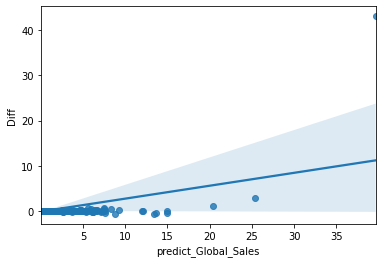

In [24]:
# Ploting the Predicted Global Sales and difference from the actual sales

sns.regplot(out['predict_Global_Sales'],out['Diff'])

In [25]:
# Preparing test set and traing set for Linear Regression

lr_X_train=X_train[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
lr_X_test=X_test[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
lr_Y_train=Y_train
lr_Y_test=Y_test

In [26]:
#Linear Regression model and their traning and testing score

lr = LinearRegression()
lr.fit(lr_X_train, lr_Y_train)
lr_score_train = lr.score(lr_X_train, lr_Y_train)
print("Training score: ",lr_score_train)
lr_score_test = lr.score(lr_X_test, lr_Y_test)
print("Testing score: ",lr_score_test)

Training score:  0.9999875884330719
Testing score:  0.9999920979904912


In [27]:
# Predicting through Linear Regression

y_pre = lr.predict(lr_X_test)

In [28]:
# Creating the dataframe for actual value, predicting value and difference

out_lr = pd.DataFrame({'Actual_Global_Sales': lr_Y_test, 'Predict_Global_Sales': y_pre,'Diff' :(lr_Y_test-y_pre)})
out_lr[['Actual_Global_Sales','Predict_Global_Sales','Diff']].head(5)

,Actual_Global_Sales,Predict_Global_Sales,Diff
15302,0.02,0.020303,-0.000303
4829,0.40,0.390278,0.009722
7118,0.23,0.230277,-0.000277
11189,0.09,0.090309,-0.000309
9818,0.12,0.120296,-0.000296


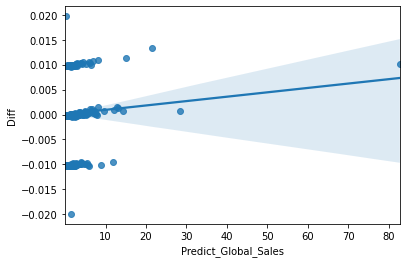

In [29]:
# Ploting the Predicted value and its dfference from actual value

sns.regplot(out_lr['Predict_Global_Sales'],out_lr['Diff'])

In [30]:
#Ensemble XGBOOST & LINEAR REGRESSOR for train data

en_dtest=xgb.DMatrix(X_train)
y_xgb_pred = xgb_model.predict(en_dtest)

y_lr_pred = lr.predict(lr_X_train)

Ensemble=pd.DataFrame({'XGBOOST':y_xgb_pred ,'LINEAR_REG':y_lr_pred ,'GLOBAL_SALES':lr_Y_train})

In [31]:
Ensemble.head(5)

,XGBOOST,LINEAR_REG,GLOBAL_SALES
3291,0.620722,0.620234,0.61
193,5.142086,5.129731,5.13
1403,1.366299,1.380155,1.38
2812,0.724874,0.730349,0.73
7565,0.192753,0.200252,0.20


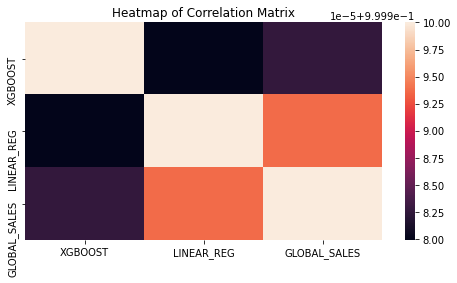

In [32]:
# Finging the correlation between XGBoost and Linear Regression predicted data with acutal data

corr=Ensemble.corr()
corr = (corr)

plt.figure(figsize=(8,4))
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
ax.set_title('Heatmap of Correlation Matrix')
plt.show()

In [33]:
# Ensemble XGBOOST & LINEAR REGRESSOR for test data

en_dtest_1=xgb.DMatrix(X_test)
y_xgb_pred_1 = xgb_model.predict(en_dtest_1)

y_lr_pred_1 = lr.predict(lr_X_test)

Ensemble_test_with_actual=pd.DataFrame({'XGBOOST':y_xgb_pred_1,'LINEAR_REG':y_lr_pred_1,'ACTUAL_SALES':lr_Y_test})

In [34]:
# Creating the Ensemble test

Ensemble_test=Ensemble_test_with_actual[['XGBOOST','LINEAR_REG']]

Ensemble_test.shape,Ensemble.shape

((3259, 2), (13032, 3))

In [35]:
Ensemble_test.head(5)

,XGBOOST,LINEAR_REG
15302,0.020506,0.020303
4829,0.403271,0.390278
7118,0.233073,0.230277
11189,0.088922,0.090309
9818,0.120218,0.120296


In [36]:
# Spliting into Train and Test set
label = Ensemble.pop('GLOBAL_SALES')
X_train, X_test, Y_train, Y_test = train_test_split(Ensemble, label, test_size = 0.3, random_state = 200)

In [37]:
# Traning model in Linear Regression and calculating train and test score

clf = linear_model.Lasso(alpha=1e-4)
clf.fit(X_train,Y_train)
tr_scr=clf.score(X_train,Y_train)
print("Training score: ",tr_scr)
ts_scr=clf.score(X_test,Y_test)
print("Testing score: ",ts_scr)

Training score:  0.9999650634134079
Testing score:  0.9999659452986733


In [38]:
# Predicting the data

ensm_prd=clf.predict(Ensemble_test)

In [39]:
# Storing the Linear Regression and XGBost in a dataframe

output=pd.DataFrame({'LINEAR_REGRASSOR':Ensemble_test['LINEAR_REG'],'XGBOOST':Ensemble_test['XGBOOST'],'ENSEMBLE':ensm_prd,'ACTUAL_PRICE':Ensemble_test_with_actual['ACTUAL_SALES']})

output.head(10)

,LINEAR_REGRASSOR,XGBOOST,ENSEMBLE,ACTUAL_PRICE
15302,0.020303,0.020506,0.020526,0.02
4829,0.390278,0.403271,0.403300,0.40
7118,0.230277,0.233073,0.233099,0.23
11189,0.090309,0.088922,0.088944,0.09
9818,0.120296,0.120218,0.120240,0.12
9900,0.110283,0.116872,0.116894,0.12
10590,0.100297,0.102479,0.102501,0.10
3916,0.520258,0.494900,0.494934,0.51
9654,0.130308,0.130072,0.130095,0.13
8787,0.150296,0.155440,0.155463,0.15


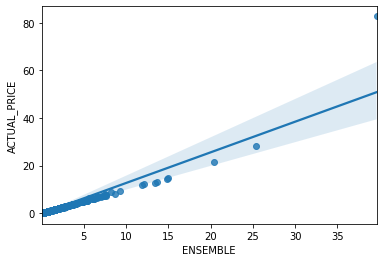

In [40]:
# Ploting the Ensemble and actual values

sns.regplot(output['ENSEMBLE'],output['ACTUAL_PRICE'])